In [ ]:
import pandas as pd
import numpy as np

In [ ]:
ficheiro = "census-income.csv"

In [ ]:
dados = pd.read_csv("census-income.csv", delimiter=",", header=None)

In [ ]:
dados.head(n=5)

In [ ]:
type(dados)

In [ ]:
dados.tail(n=4)

In [ ]:
print(dados.info())

In [ ]:
print(dados.describe())

In [ ]:
dados.columns = ["age","workclass","fnlwgt","education",
"education_num","marital_status","occupation","relationship","race","sex",
"capital_gain","capital_loss","hours_per_week","native_country","X"]

In [ ]:
dados.head(n=5)

In [ ]:
native_countries = dados['native_country'].unique()
print(native_countries)

In [ ]:
dados['native_country']=dados['native_country'].str.strip()

In [ ]:
education_classes = dados['education'].unique()
education_classes

In [ ]:
dados = dados.applymap(lambda x: x.strip() if isinstance(x, str) else x)

In [ ]:
dados.isnull().sum()

In [ ]:
dados['native_country']=dados['native_country'].replace('?', None)

In [ ]:
dados_new=dados.drop(['workclass','education','marital_status','race'],axis = 1)

In [ ]:
dados_30_35=dados[(dados['age'] >= 30) & (dados['age'] <= 35)]
dados_30_35.head(n=5)

In [ ]:
dados_30_35female=dados.loc[(dados['age'] >= 30) & (dados['age'] <= 35) & (dados['sex']=='Female')]
dados_30_35female.head(n=5)

In [ ]:
idade_media=dados["age"].mean()
print("idade média =", idade_media) # ou arredondando na 2ª casa decimal
print("idade média =", round(idade_media,2))

In [ ]:
dados_30_35[2:5]

In [ ]:
amostra = pd.Series([1,np.NaN,2,None,3,4])
print("média da amostra = " , amostra.mean())

In [ ]:
dici = {'Column1': [1, 2, 3, 4],
 'Column2': [5, 6, 7, 8],
 'Column3': [9, 10, 11, 12]}
df = pd.DataFrame(dici)
media_das_colunas = df.mean()
print("média das colunas =", media_das_colunas)
type(media_das_colunas)

In [ ]:
serie = pd.Series([1, 2, np.NaN, 4, 5, 9, 123])
mediana = serie.median()
print("Mediana = ", mediana)

In [ ]:
dadosq = pd.Series([1, 2, 4, 4, 5, 9, 5, 8, 9, 13 ,3 ,5 ,6])
ordem=0.75
dadosq.quantile(q=ordem)

In [ ]:
def calcula_aiq(data):
    """
    Calcula a amplitude interquartil (AIQ) de data
    Parametros:
    - data: pandas.Series, pandas.DataFrame
    Retorna:
    - aiq: amplitude interquartil

    """
    Q1 = data.quantile(q=0.25)
    Q3 = data.quantile(q=0.75)
    aiq = Q3-Q1
    return aiq

dadosq_aiq=calcula_aiq(dadosq)
print("Amplitude interquartil =", dadosq_aiq)

In [ ]:
dadosq.var()

In [ ]:
dadosq.std()

In [ ]:
def coef_assimetria(data):
    n = len(data)
    media=data.mean()
    s = data.std()

    a3=n/((n-1)*(n-2))*1/s**3*((data-media)**3).sum()

    return a3

print(coef_assimetria(dadosq))
print(dadosq.skew())

In [ ]:
datak=np.random.normal(size=(4,1))

In [ ]:
Dframe = pd.DataFrame(datak,columns=["col1"])
print(f"curtose :",Dframe["col1"].kurt())

In [ ]:
freq_absolutas = pd.crosstab(dados['education'],'numero de pessoas')
print(freq_absolutas)

In [ ]:
freq_relativas=pd.crosstab(dados['education'],'numero de pessoas',normalize=True)
print(freq_relativas)

In [ ]:
freq_table = pd.crosstab(dados['education'], dados['sex'])
print(freq_table)
type(freq_table)


In [ ]:
freq_absolutas.plot.bar(x=None, y=None)

In [ ]:
freq_table.plot.bar(x=None, y=None)

In [ ]:
dfsex=dados['sex']
freq_bysex = pd.crosstab(dfsex,'numero')
#freq_relbysex=freq_bysex/len(dados['sex'])
freq_relbysex=pd.crosstab(dfsex,'numero',normalize=True)
freq_relbysex['numero'].plot(kind='pie', y='Value')

<Axes: title={'center': 'age'}, xlabel='sex'>

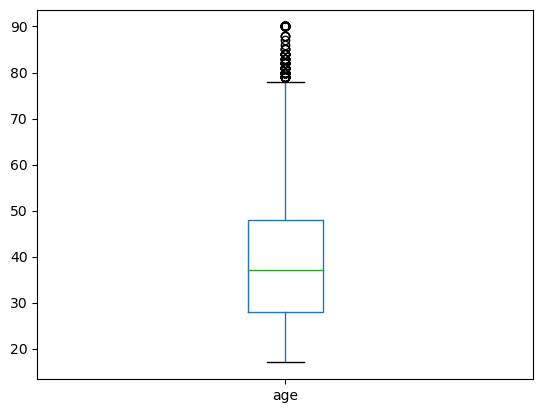

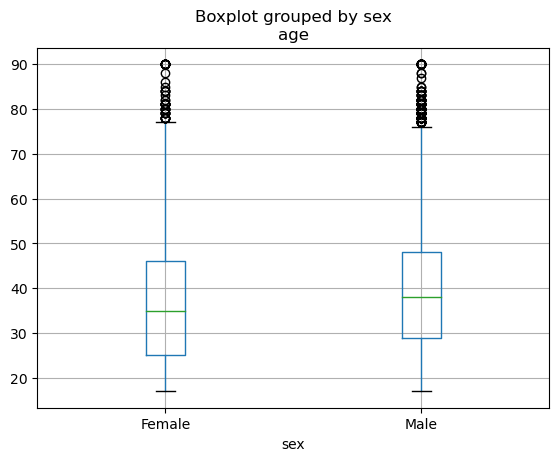

In [44]:
dados.boxplot(by =None, column =['age'], grid = False)
dados.boxplot(by ='sex', column =['age'], grid = True)

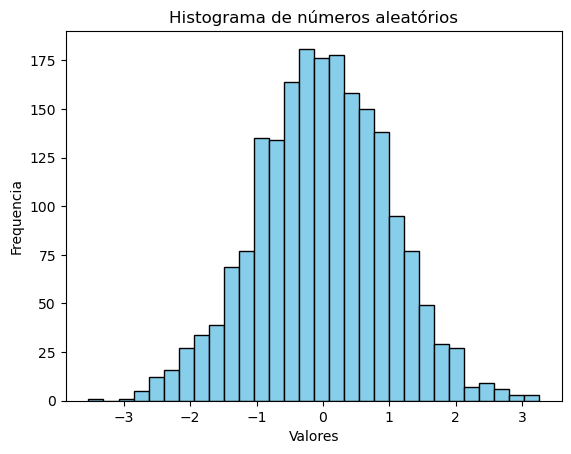

In [45]:
import matplotlib.pyplot as plt
np.random.seed(81) # seed 81
num_aleat = np.random.normal(loc=0, scale=1,size=2000) # numpy.ndarray
# help(np.random.normal)
num_aleatorios = pd.DataFrame({'valores': num_aleat}) # pandas.DataFrame
#
num_aleatorios['valores'].plot(kind='hist', bins=30, edgecolor='black', color='skyblue')
#
plt.title('Histograma de números aleatórios')
plt.xlabel('Valores')
plt.ylabel('Frequencia')
plt.show()

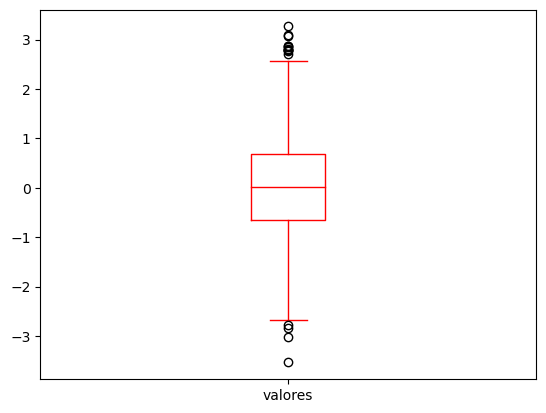

In [46]:
num_aleatorios.boxplot(by =None, column =['valores'],grid = False, color='red')
media=num_aleatorios.mean()